[View in Colaboratory](https://colab.research.google.com/github/imyeeun/study/blob/master/eda_to_prediction_dietanic.ipynb)

In [6]:
ls -lha kaggle.json

-rw-r--r-- 1 root root 62 Oct 16 06:39 kaggle.json


In [8]:
!pip install kaggle

    100% |████████████████████████████████| 61kB 2.3MB/s 
    100% |████████████████████████████████| 235kB 5.0MB/s 
  Running setup.py bdist_wheel for kaggle ... - \ done
  Stored in directory: /root/.cache/pip/wheels/44/2c/df/22a6eeb780c36c28190faef6252b739fdc47145fd87a6642d4
  Running setup.py bdist_wheel for python-slugify ... - done
  Stored in directory: /root/.cache/pip/wheels/e3/65/da/2045deea3098ed7471eca0e2460cfbd3fdfe8c1d6fa6fcac92
Successfully built kaggle python-slugify


In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [11]:
!kaggle competitions download -c titanic

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 29.4MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 25.9MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 3.74MB/s]


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [0]:
data=pd.read_csv('train.csv')

In [14]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
data.isnull().sum() #checkikng for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**얼마나 살았을까??**

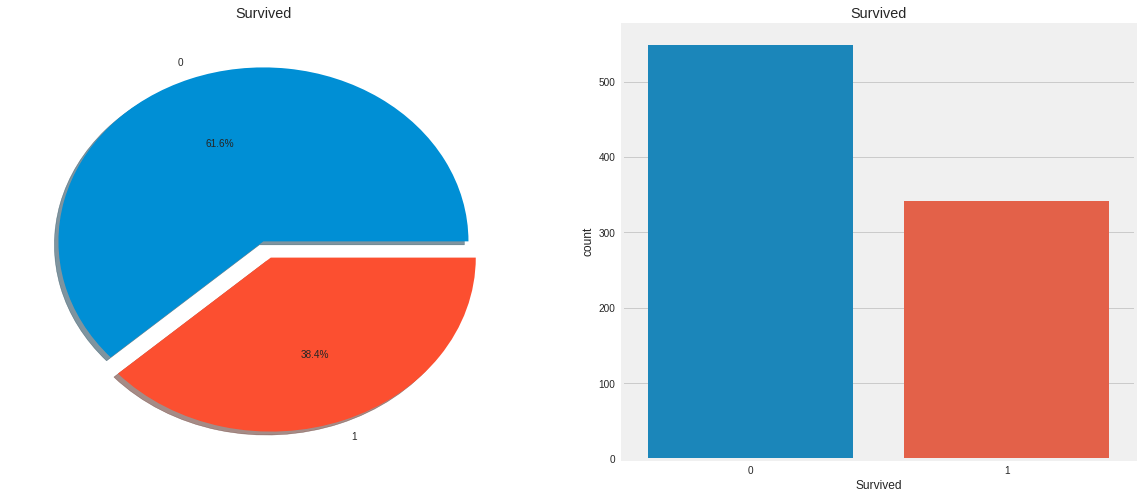

In [16]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%',ax=ax[0],
                                        shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

사고에서 살아남은 승객이 많지 않다는 것은 분명하다.

훈련 세트의 891명의 승객 중 약 350명만이 살아남았다. 즉, 전체 훈련 세트의 38.4%만이 충돌에서 살아남았다. 우리는 데이터에서 더 많은 정보를 얻어내고 어떤 범주의 승객들이 살아남았고 누가 살아남았는지 알아내야 한다.

우리는 데이터 집합의 다른 기능을 사용하여 생존율을 확인하려고 합니다. 몇몇 특징들은 섹스, 감방의 항구, 나이, 기타등입니다.

먼저 다양한 특징들을 이해합시다.

**Types Of Features**

**Categorical Features:**

범주형 변수는 두 개 이상의 범주가 있는 범주이며 해당 피쳐의 각 값은 범주별로 분류할 수 있습니다.예를 들어 성별은 두 개의 범주(남성 및 여성)를 갖는 범주형 변수입니다. 이제 이러한 변수를 정렬하거나 주문할 수 없습니다. 그들은 명목상의 변수라고도 알려져 있다.

**Categorical Features in the dataset: Sex,Embarked.**

**Ordinal Features:**

순서형 변수는 범주형 값과 유사하지만, 그 사이의 차이점은 값 간에 상대적인 순서 또는 정렬을 할 수 있다는 것입니다. 예: 높이, 중간, 짧은 값을 가진 높이와 같은 피쳐가 있는 경우 높이는 순서형 변수입니다. 여기서는 변수에서 상대적인 정렬을 할 수 있습니다.

**Ordinal Features in the dataset: PClass**

**Continous Feature:**

형상은 두 점 사이에 또는 형상 열의 최소 또는 최대 값 사이에 값을 취할 수 있는 경우 지속적이라고 한다.

**Continous Features in the dataset: Age**

**Analysing The Features**

**Sex--> Categorical Feature**

In [17]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

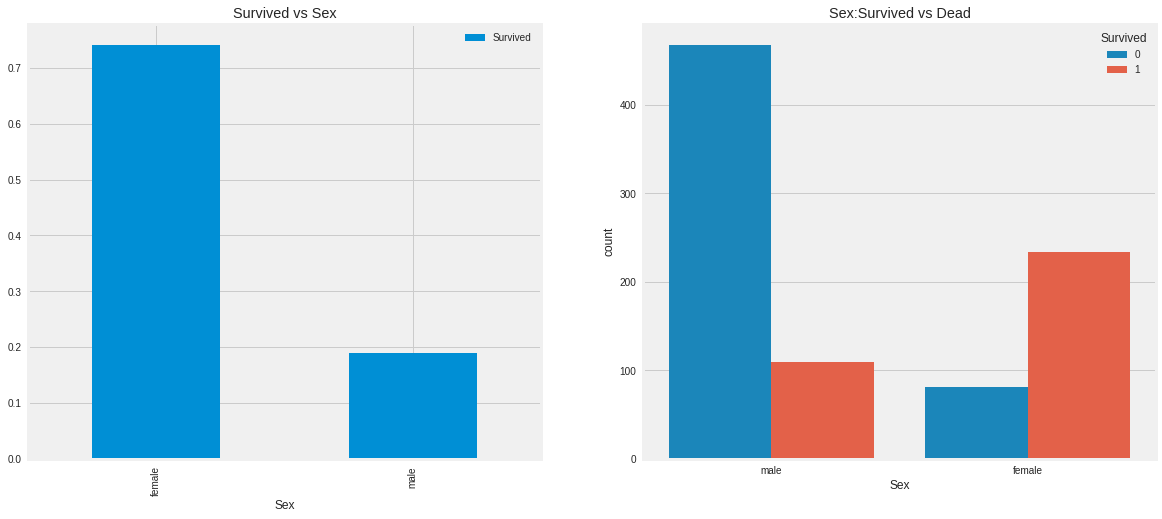

In [18]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

재밌게도 배에 탄 남자들의 수는 여자들의 수보다 훨씬 많다. 여전히, 여성의 생존은 남성의 거의 두 배이다. 배에 탄 여성의 생존률은 약 75%이며 남성은 약 18-19%이다.

이 기능은 모델링에 매우 중요한 피쳐로 보입니다. 하지만 그게 최고일까요? 다른 피쳐들을 확인하겠습니다.

**Pclass --> Ordinal Feature**

In [19]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


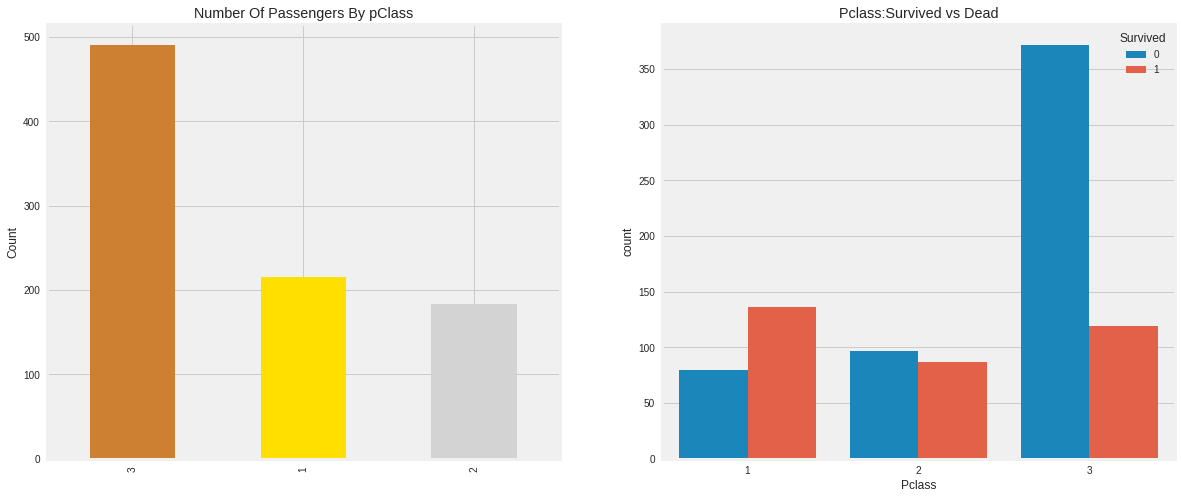

In [20]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By pClass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

사람들은 돈이 모든 것을 살 수 없다고 말한다. 하지만 우리는 Pclass 1의 패스네거들이 구조하는 동안 매우 높은 우선순위를 부여받았음을 분명히 알 수 있다. P클래스 3의 승객 수는 훨씬 더 많았지만, 생존자의 수는 여전히 매우 낮으며, 약 25% 정도이다.

Pclass 1의 경우 약 63%이고 Pclass2의 경우 약 48%입니다. 그래서 돈과 지위가 중요합니다. 물질만능의 세상이죠.

조금 더 자세히 관찰하고 다른 흥미로운 관측치를 확인할 수 있습니다. Sex와 Pclass가 함께 생존율을 확인해보자.

In [21]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

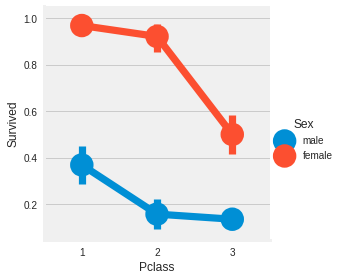

In [22]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

이 경우 우리는 FactorPlot를 사용합니다. FactorPlot은 범주형 값의 분산을 쉽게 하기 때문입니다.

크로스탭과 팩터플롯을 보면, 우리는 P클래스1에서 온 94명의 여성들 중 3명만이 사망했기 때문에 P클래스1에서 여성들의 생존이 95-96%라고 쉽게 추론할 수 있다.

P클래스에 상관없이, 여성들은 구조하는 동안 최우선 순위가 주어졌음이 분명하다. 심지어 Pclass1의 남자들도 생존율이 매우 낮습니다.

Pclass도 중요한 특징인 것 같다. 다른 피쳐를 분석할 수 있습니다.

**Age--> Continous Feature**

In [23]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


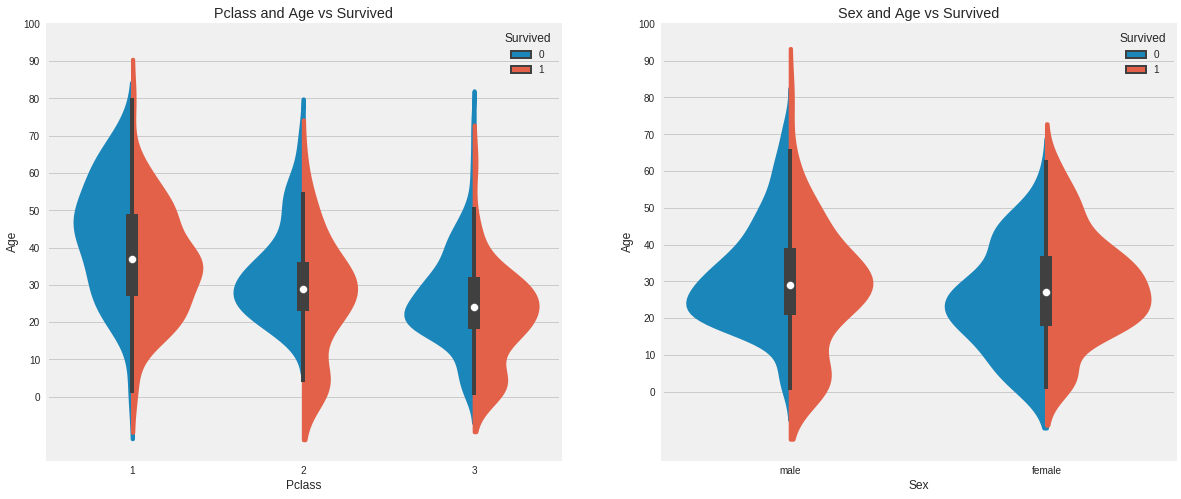

In [24]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age",hue = "Survived", data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age",hue = "Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

**Observations:**

1)Pclass에 따라 어린이 수가 증가하고 10세 미만(즉, 아동)의 생존율은 Pclass와 무관하게 양호해 보입니다.

2)Pclass1에서 2050세의 Passenger의 생존 가능성은 높으며, 여성에게는 더욱 좋다.

3)남자의 경우 나이가 들수록 생존 가능성은 감소한다.

앞에서 본 바와 같이, 연령 기능은 177개의 null 값을 갖습니다. 이러한 NaN 값을 대체하기 위해 데이터 세트의 평균 수명을 할당할 수 있습니다.

하지만 문제는 많은 연령대의 사람들이 있었다는 것이다. 우리는 29살의 평균 연령을 가진 4살짜리 아이를 배정할 수 없다. 승객이 몇 살짜리 밴드를 찾을 수 있는 방법이 있나요?

빙고!!!! Name 기능을 확인할 수 있습니다. 그 특징을 보면, 우리는 그 이름들이 미스터나 부인 같은 호칭을 가지고 있다는 것을 알 수 있다. 따라서 우리는 각 그룹에 대한 부부 평균값을 할당할 수 있다.

"A이름에는 무엇이 있나요?"-> 특징:p

In [0]:
data['Initial']=0
for i in data:
  data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')#lets extract the Salutations

좋습니다. 여기서는 Regex를 사용합니다. [A-Za-z]+) 그래서 A-Z나 a-z 사이에 있는 문자열을 찾고, 그 다음에 .(점)을 찾습니다. 이름에서 Initials를 추출했습니다.

In [26]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Mlle이나 Mme와 같은 철자가 틀린 이니셜이 있습니다. 나는 그것들을 미스 그리고 다른 값들로 바꿀 것이다.

In [0]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)


In [28]:
data.groupby('Initial')['Age'].mean() #lets check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

**Filling NaN Ages**

In [0]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [30]:
data.Age.isnull().any()

False

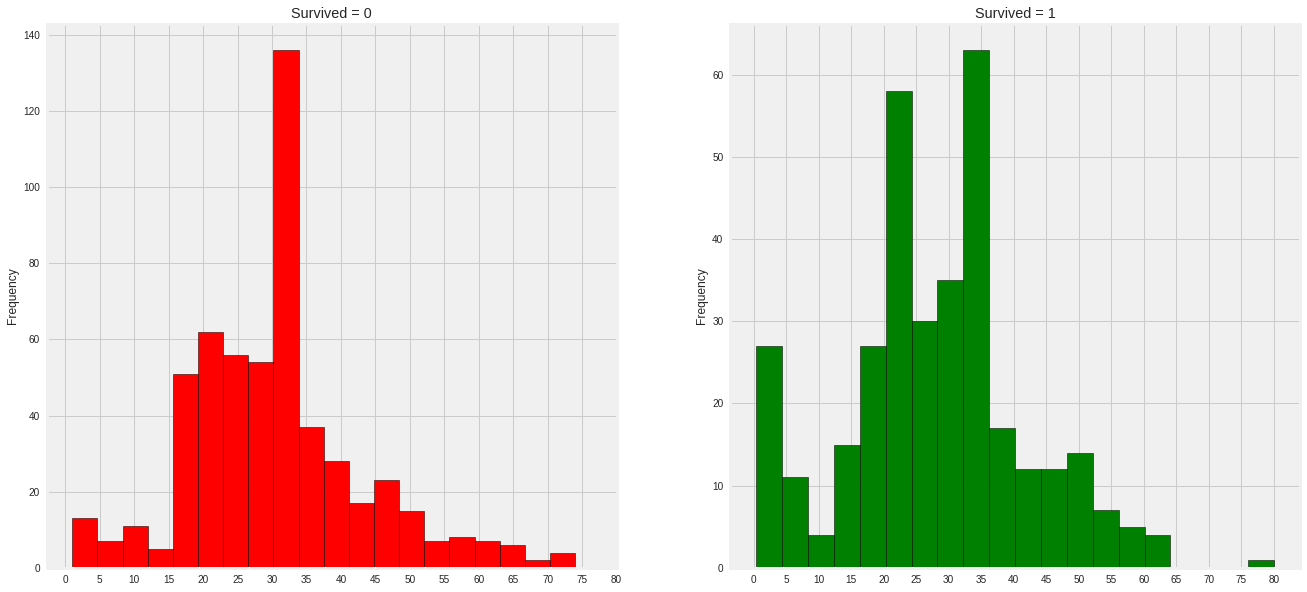

In [31]:
f, ax = plt.subplots(1,2,figsize = (20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived = 0')
x1 = list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived = 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

**Observations:**

1)토들러(5세)는 대량생존(여성 및 아동 우선 정책).

2)고령의 승객 생존(80년).

3)최대 사망자 그룹대는 30-40세였다.

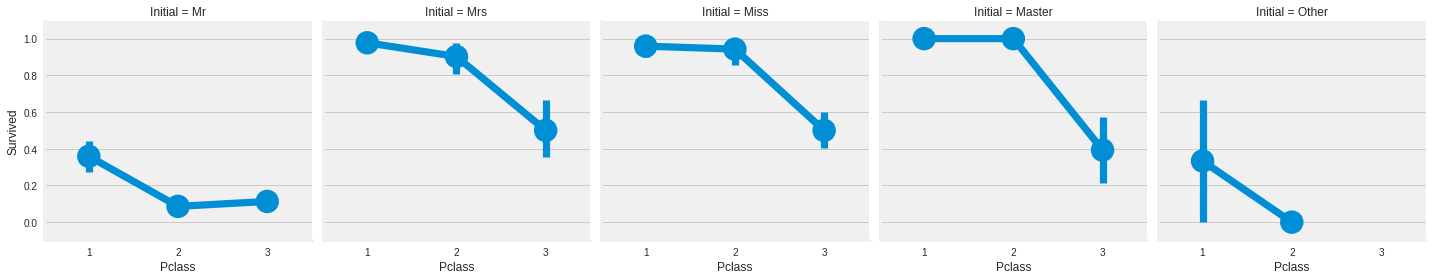

In [32]:
sns.factorplot('Pclass','Survived',col='Initial',data = data)
plt.show()

따라서 여성과 아동의 첫 번째 정책은 계층과 상관없이 그대로 적용된다.

**Embarked--> Categorical Value**

In [33]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

**Chances for Survival by Port Embakation**

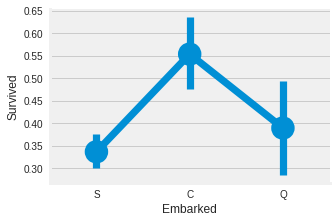

In [34]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

포트 C의 생존 가능성은 0.55 정도이며 S의 경우 가장 낮다.

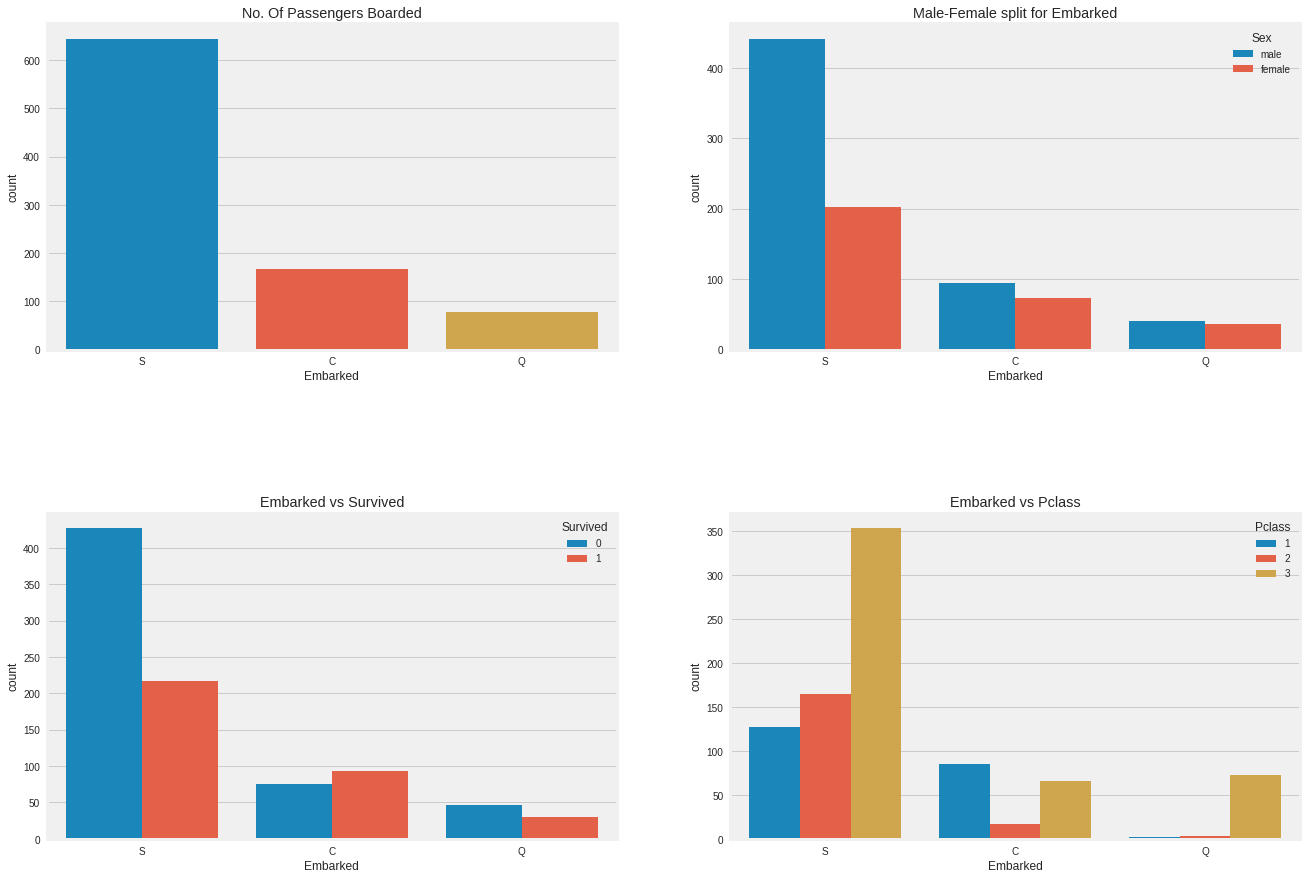

In [36]:
f, ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

**Observations:**

1)S.에서 탑승한 최대 패스너는 Pclass3입니다.

2)C에서 온 승객 중 상당수가 살아남았기 때문에 운이 좋은 것으로 보입니다. 그 이유는 아마도 모든 Pclass1과 Pclass2 승객들의 구조일 것이다.

3)엠바크 S는 부자들의 대다수가 승선한 항구를 바라본다. 여전히 여기서 생존 가능성은 낮다. 그것은 Pclass3에서 81%정도의 많은 승객들이 살아남지 못했기 때문이다.

4) 항만 Q는 Pclass3 승객의 95%를 차지했다.

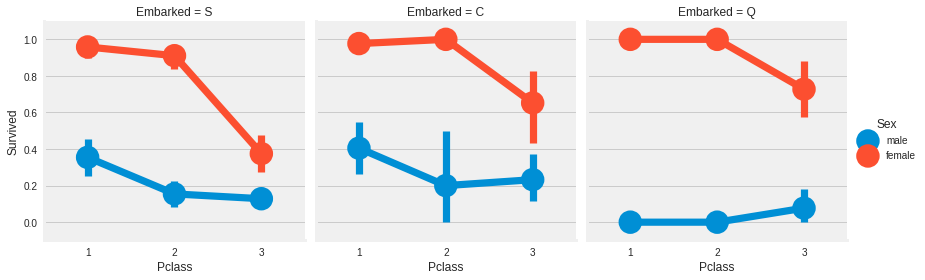

In [37]:
sns.factorplot('Pclass','Survived',hue ='Sex',col='Embarked',data=data)
plt.show()

**Observations:**

1)Pclass1과 Pclass2의 여성 생존 확률은 Pclass1과 Pclass2의 여성에 거의 1입니다.

2)남녀 생존율이 매우 낮기 때문에 Pclass3 Pass3 Passenger에게는 포트S가 매우 불운해 보입니다.(돈의 문제)

3)Pclass 3에서 나온 거의 모든 사람들이 그랬기 때문에 Port Q는 남자들에게 가장 이상해 보인다.

**Filling Embarked NaN**

우리가 항구에서 탑승한 최대 승객들을 보았듯이, 우리는 NaN을 S로 대체한다.

In [0]:
data['Embarked'].fillna('S',inplace=True)

In [40]:
data.Embarked.isnull().any() #Finally No Nan values

False

**SibSip-->Discrete Feature**

이 특징은 사람이 혼자인지 아니면 가족과 함께 있는지 나타냅니다.

형제자매

배우자 = 남편, 아내

In [42]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


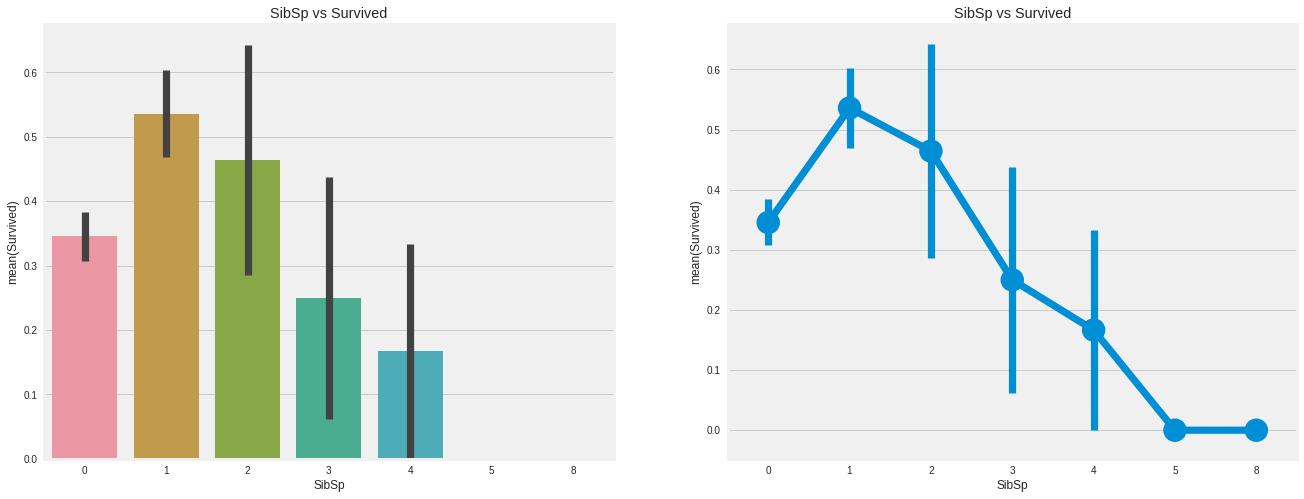

In [43]:
f, ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [44]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


**Observations:**

바 플롯과 요인 그림은 승객이 형제가 없는 혼자 탑승한 경우 34.5%의 생존률을 가지고 있음을 보여준다. 형제자매의 수가 증가하면 그래프는 대략 감소한다. 말이 되네요. 즉, 만약 내게 가족이 있다면, 나는 먼저 나를 구하는 대신에 그들을 구하려고 노력할 것이다. 놀랍게도 5-8명의 가족들의 생존률은 0%이다. 그 이유는 아마도 P클래스가 아닐까?

그 이유는 Pclass이다. 크로스탭은 SibSp>3을 가진 사람이 모두 Pclass3에 속했다는 것을 보여준다. Pclass3(3)의 모든 대가족이 곧 사망할 것이다.

**Parch**

In [46]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


크로스탭은 더 큰 가족들이 Pclass3에 있었다는 것을 다시 보여준다.

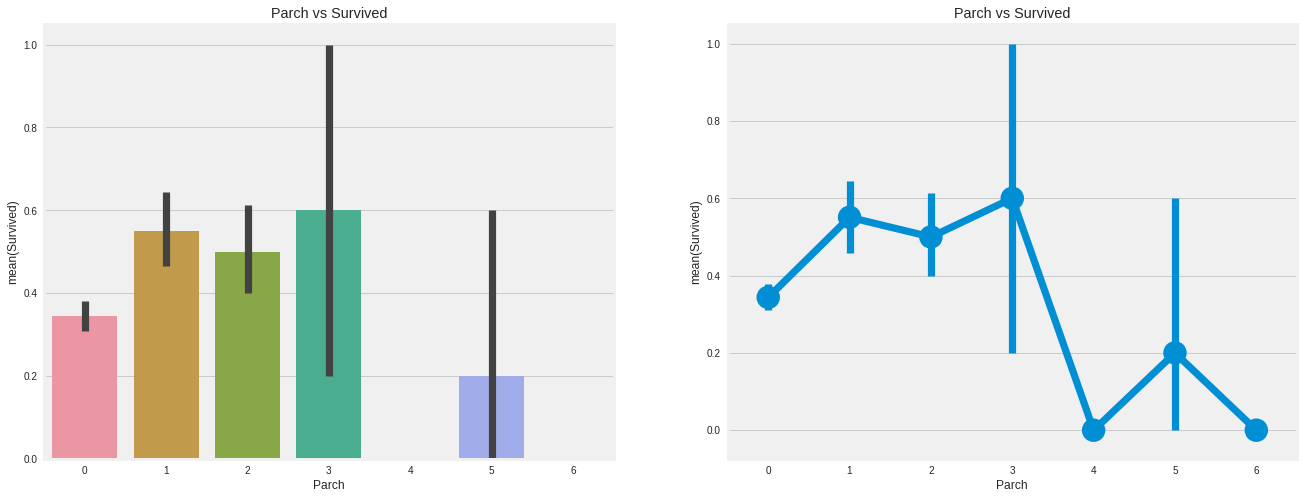

In [47]:
f, ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

**Observations:**

여기도 결과는 꽤 비슷하다. 부모를 태운 승객들은 생존 가능성이 더 높다. 하지만 숫자가 증가함에 따라 줄어들었다.

생존 가능성은 배에 13명의 부모가 있는 사람에게 좋다. 혼자 있는 것은 또한 치명적이라는 것을 증명하고 배에 4명 이상의 부모가 있을 때 생존할 가능성이 줄어든다.

**Fare--> Continous Feature**

In [48]:
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


최저 요금은 0.0입니다. 와우!! 무료 탑승입니다.

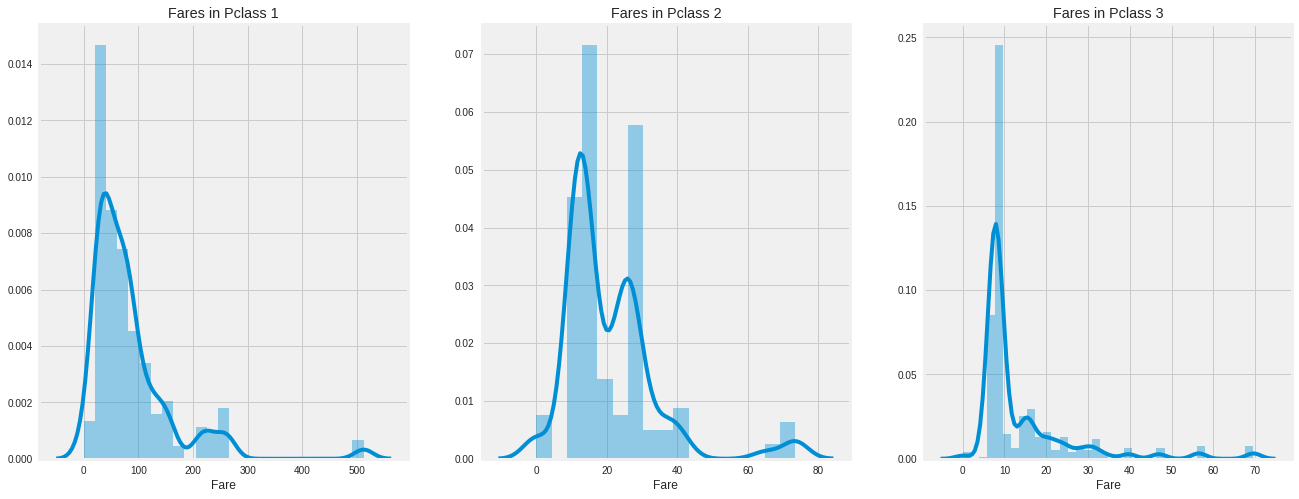

In [49]:
f, ax = plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

Pclass1의 승객 요금에 큰 분포가 있는 것으로 보이며, 이 분포는 기준이 감소함에 따라 계속 감소됩니다. 이것은 또한 지속적이기 때문에, 우리는 binning을 사용하여 별개의 값으로 변환할 수 있습니다.

**Observations in a Nutshell for all features:**

성: 남성들에 비해 여성의 생존 가능성은 높다.

Pclass:1등 승객이 되는 것이 더 나은 생존의 기회를 준다는 뚜렷한 추세가 있습니다. Pclass3의 생존율은 매우 낮다. 여성의 경우, Pclass1에서 생존할 가능성은 거의 1이며 Pclass2에서 생존할 가능성도 높다. 돈이 승리한다!!!

나이: 5-10세 미만의 어린이들은 생존할 가능성이 높습니다. 15세에서 35세 사이의 승객들은 많이 죽었다.

이것은 매우 흥미로운 특징이다. 비록 대부분의 Pclass1 승객들이 Q에서 S. 승객들에게 일어났지만 C에서 생존할 가능성은 Pclass3에서 온 것 보다 더 높아 보인다.

Parch+Sibsp: 1-2명의 형제자매, spouse 또는 1-3명의 부모가 있는 것은 혼자 있거나 당신과 함께 여행하는 대가족을 갖는 것보다 더 많은 확률의 가능성을 보여준다.

**Correlation Between The Features**

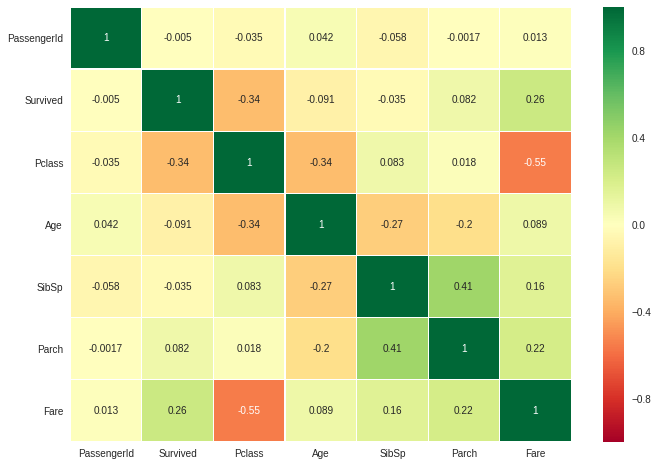

In [50]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-correlation matrix
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

**Interpreting The Heatmap**

첫 번째로 주목할 것은 알파벳과 문자열 사이에 상관관계가 없다는 것이 명백하기 때문에 숫자 기능만 비교된다는 것이다. 줄거리를 이해하기 전에 정확히 어떤 상관관계가 있는지 보자.

위치 연결: 피쳐 A가 증가하면 피쳐 B가 증가합니다. 값 1은 완전한 양의 상관 관계를 의미합니다.

NEGATIVE CORRELATION: 피쳐 A가 증가하면 피쳐 B가 감소하게 되며, 이러한 상관 관계가 음수입니다. 값 -1은 완전한 부정적인 상관 관계를 의미합니다.

이제 두 개의 형상이 서로 높은 또는 완벽하게 연관되어 있다고 가정하면, 한 형상의 증가는 다른 형상의 형상이 증가하게 된다. 이는 두 형상이 모두 매우 유사한 정보를 포함하고 있고 정보에는 차이가 거의 없거나 거의 없음을 의미한다. 이 정보를 모두 거의 동일한 정보를 포함하고 있기 때문에 MultiColineity라고 합니다.

그래서 둘 중 하나가 중복되는 것이기 때문에 둘 다 사용해야 한다고 생각하세요? 모델을 제작하거나 교육하는 동안, 우리는 중복된 특징들을 제거하려고 노력해야 합니다. 그것이 훈련 시간을 단축시키고 많은 그러한 이점들을 감소시키기 때문입니다.

위의 열 지도에서 우리는 그 특징들이 별로 상관관계가 없다는 것을 알 수 있다. 가장 높은 상관관계는 SibSp와 Parch 사이에 있습니다. 즉 0.41. 그래서 우리는 모든 피쳐들을 계속할 수 있습니다.

# Part2: Feature Engineering and Data Cleaning

이제 피쳐 엔지니어링이란 무엇일까요?

기능이 포함된 데이터 세트를 제공할 때마다 모든 기능이 중요할 필요는 없습니다. 제거되어야 할 많은 중복 기능이 있을 수 있다. 또한 다른 형상에서 정보를 관찰하거나 추출하여 새로운 형상을 얻거나 추가할 수 있다.

Name 기능을 사용하여 Initials 기능을 얻는 것이 그 예입니다. 새로운 기능이 있는지 확인하고 몇 가지 기능을 제거합니다. 또한 기존 관련 기능을 예측 모델링에 적합한 형태로 전환할 예정입니다.

**Age_band**

연령 피쳐의 문제:
앞에서 언급했듯이, 나이는 계속적인 특징이며 기계 학습 모델의 연속 변수에는 문제가 있습니다.

예를 들어 내가 스포츠 사람을 성별에 따라 분류하거나 배열하라고 하면, 우리는 쉽게 그들을 남자와 여자로 분리할 수 있어.

이제 제가 연령별로 분류하라고 하면 어떻게 하시겠습니까? 만약 30명의 사람들이 있다면, 30명의 나이 값이 있을 것이다. 이제 이것은 문제가 됩니다.

우리는 빈닝이나 정규화를 통해 이러한 지속 값을 범주형 값으로 변환할 필요가 있다. 나는 다양한 연령을 단일 빈으로 그룹화하거나 단일 값을 할당할 것이다.

승객의 최대 연령은 80세였습니다. 그럼 0~80의 범위를 5개의 빈으로 나누자. 그래서 80/5=16. 그래서 16사이즈의 빈입니다.

In [51]:
data['Age_band']=0
data.loc[data['Age']<=16, 'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32), 'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48), 'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64), 'Age_band']=3
data.loc[data['Age']>64, 'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [52]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer_r')#checking the number of passengers in each band

,Age_band
1,382
2,325
0,104
3,69
4,11


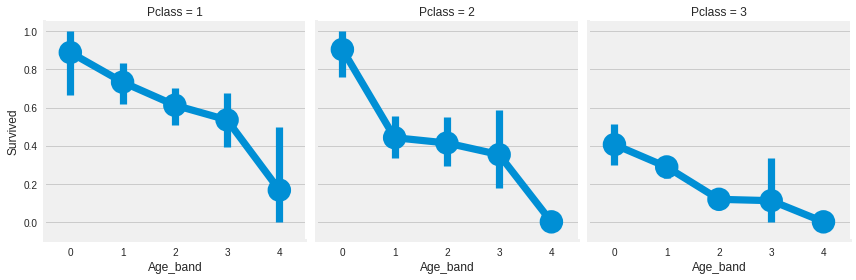

In [53]:
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')
plt.show()

사실이야..생존율은 P클래스에 관계없이 나이가 증가함에 따라 감소한다.

**Family_Size and Alone**

이 시점에서, 우리는 "Family_size"와 "Alone"이라는 새로운 기능을 만들어 그것을 분석할 수 있다. 이 기능은 Parch와 SibSp의 합계입니다. 그것은 우리에게 복합적인 데이터를 제공하여 생존율이 승객들의 가족 크기와 관련이 있는지 확인할 수 있습니다. 혼자 사는 사람이 혼자인지 아닌지는 아무도 모른다.

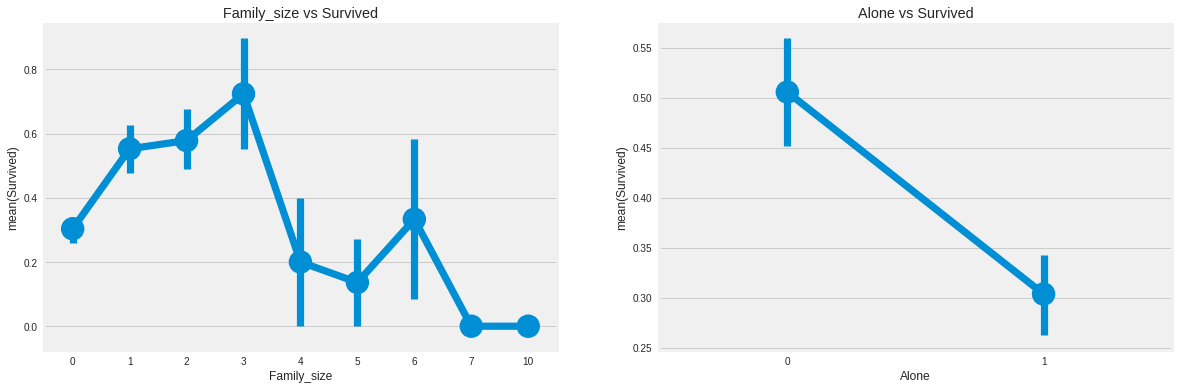

In [54]:
data['Family_size']=0
data['Family_size']=data['Parch']+data['SibSp'] #family size
data['Alone']=0
data.loc[data.Family_size==0,'Alone']=1 #Alone

f,ax = plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_size','Survived',data=data, ax=ax[0])
ax[0].set_title('Family_size vs Survived')
sns.factorplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

Family_Size=0은 통행인이 혼자라는 것을 의미한다. 분명히, 만약 당신이 혼자이거나 가족_크기=0이라면 생존 가능성은 매우 낮다. 가족수가 4를 넘으면 기회도 줄어든다. 또한 이 기능은 모델에 중요한 기능으로 보입니다. 이것을 더 자세히 살펴봅시다.

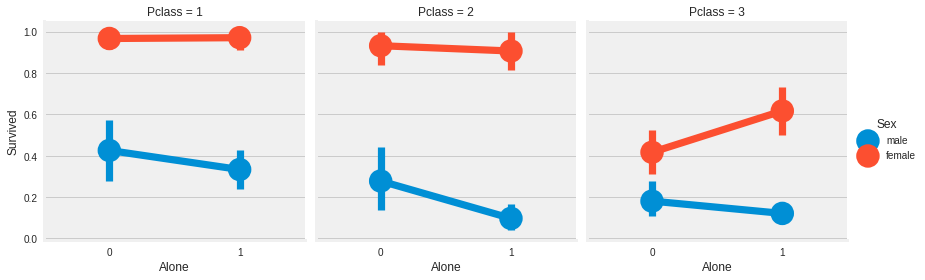

In [55]:
sns.factorplot('Alone', 'Survived', data=data, hue='Sex', col='Pclass')
plt.show()

Pclass3 여성을 제외하고 가족이 있는 경우보다 혼자있는 경우가 성별과 Pclass와 관계없이 해로울 수 있다는 것은 분명합니다.

**Fare_Range**

요금은 또한 지속적인 피쳐이기 때문에, 우리는 그것을 ordinal 값으로 바꿀 필요가 있다. 이것을 위해 우리는 pandas.qcut를 사용할 것이다.

Qcut는 통과된 빈의 수에 따라 값을 분할하거나 정렬합니다. 따라서 5개의 빈을 통과하면 값이 5개의 분리 저장 빈 또는 값 범위로 균등하게 배열됩니다.

In [56]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


위에서 논의한 바와 같이, 우리는 요금_범위가 증가함에 따라 생존 가능성이 증가한다는 것을 분명히 알 수 있다.

이제 Fare_Range 값을 그대로 전달할 수 없습니다. Age_Band와 마찬가지로 단일 값으로 변환해야 합니다.

In [0]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

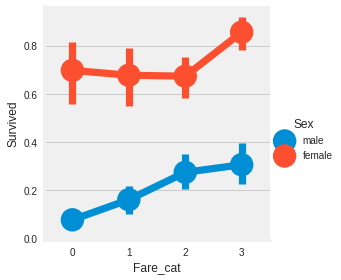

In [58]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

명백히, Fare_cat이 증가함에 따라 생존 가능성이 증가한다. 이 기능은 성별과 함께 모델링하는 동안 중요한 기능이 될 수 있습니다.

**Converting String Values into Numeric**

기계 학습 모델에 문자열을 전달할 수 없기 때문에 Sex, Embarked 등의 피쳐들을 숫자 값으로 변환할 필요가 있습니다.

In [0]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

**Dropping UnNeeded Features**

이름--> 범주형 값으로 변환할 수 없으므로 이름 특성은 필요하지 않습니다.

Age-> Ege_band 기능이 있으므로 이 기능은 필요 없습니다.

티켓 > 범주화할 수 없는 임의의 문자열입니다.

Fare--> Fare_cat 기능이 있으므로 필요하지 않습니다

카빈 > 많은 NaN 값과 많은 승객은 여러 개의 캐빈을 가지고 있다. 그래서 이것은 쓸모없는 특징이다.

Fare_Range-->fare_cat 피쳐가 있습니다.

PassengerId--> 분류할 수 없습니다.

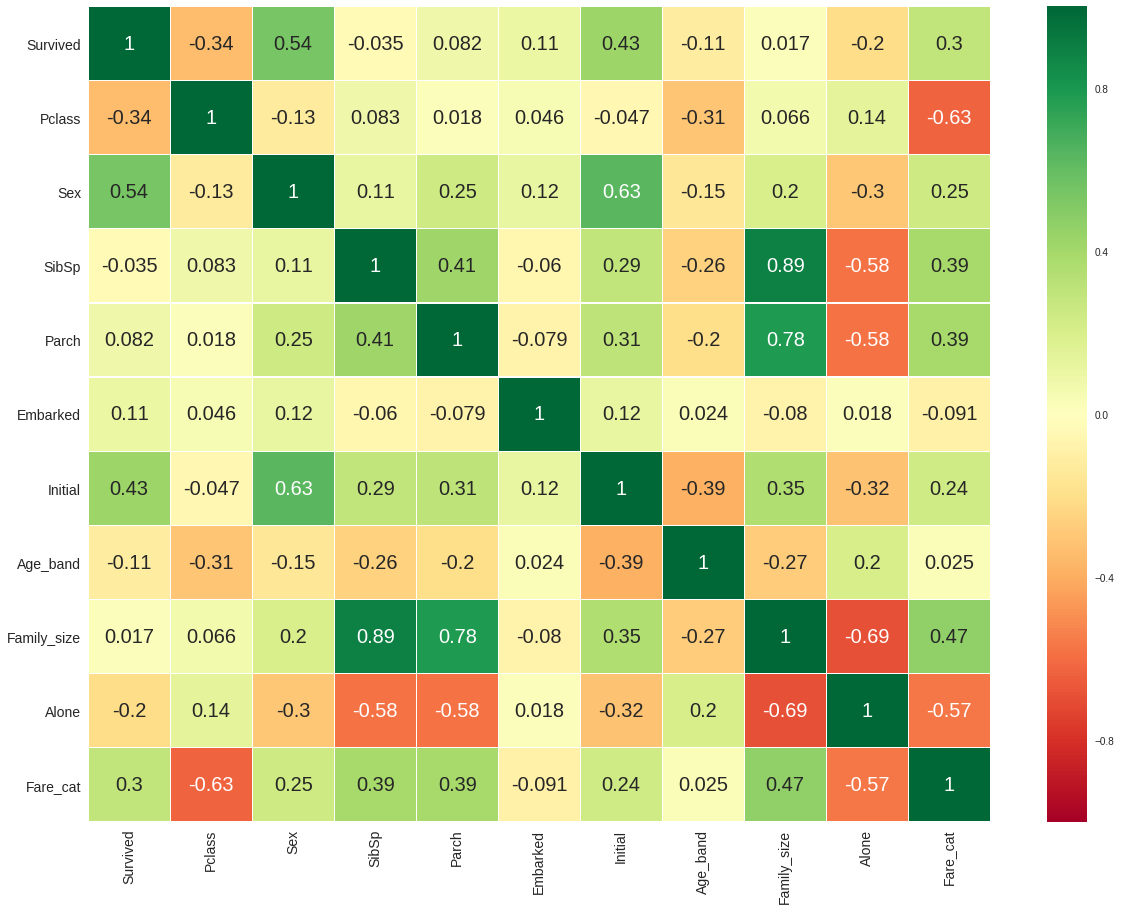

In [60]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True, cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Part3: Predictive Modeling

우리는 EDA 파트로부터 약간의 통찰력을 얻었다. 하지만 이것으로, 우리는 승객이 생존할 것인지 죽을 것인지 정확하게 예측하거나 말할 수 없다. 이제 탑승객이 생존할 것인지 아니면 훌륭한 분류 알고리즘을 사용할 것인지 예측하겠습니다.다음은 제가 모델을 만드는 데 사용할 알고리즘입니다.

1)Logistic Regression

2)Support Vector Machine (선형 및 방사형)

3)랜덤포레스트

4)K-Nearest Neighbours

5) 나이브 베이즈

6)결정 트리

7)Logistic Regression




In [0]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression#logistic regression
from sklearn import svm#support vector Machine
from sklearn.ensemble import RandomForestClassifier#Random Forest
from sklearn.neighbors import KNeighborsClassifier#KNN
from sklearn.naive_bayes import GaussianNB#Naive bayes
from sklearn.tree import DecisionTreeClassifier#Decision Tree
from sklearn.model_selection import train_test_split#training and testing data split
from sklearn import metrics#accuracy measure
from sklearn.metrics import confusion_matrix#for confusion matrix

In [0]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

**Radial Support Vector Machines(rbf-SVM)**

In [64]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.835820895522388


**Linear Support Vector Machine(linear-SVM)**

In [66]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accracy for linear SVM is 0.8171641791044776


**Logistic Regression**

In [67]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8171641791044776


**Decision Tree**

In [68]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.8059701492537313


**K-Nearest Neighbours(KNN)**

In [70]:
model=KNeighborsClassifier()
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The acuuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The acuuracy of the KNN is 0.832089552238806


이제 n_nearours 특성의 값을 변경하면 KNN 모델의 정확도가 변경됩니다. 기본값은 5입니다. n_nelevours의 다양한 값에 대한 정확도를 확인해보자.

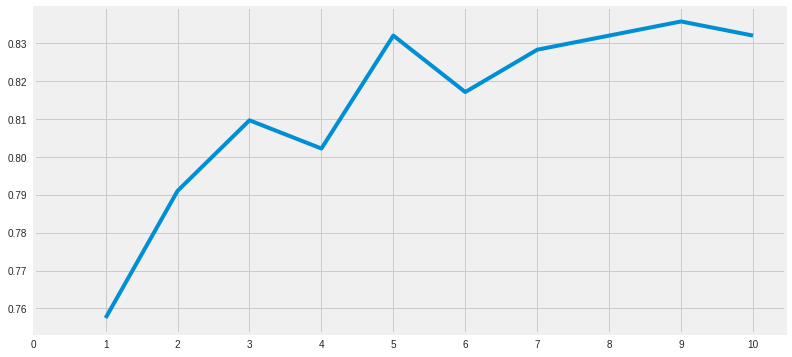

Accuracies for different values of n are: [0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] with the max value as 0.835820895522388


In [71]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(train_X,train_Y)
  prediction=model.predict(test_X)
  a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
  
plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as',a.values.max())

**Gaussian Naive Bayes**

In [73]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


**Random Forests**

In [75]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8059701492537313


모델의 정확성만이 분류자의 견고성을 결정하는 요소는 아니다. 분류자가 교육 데이터에 대해 교육을 받고 테스트 데이터에 대해 테스트되며 90%의 정확도를 얻은다고 가정해 보겠습니다.

이제 이것이 분류자에게 매우 정확한 것처럼 보이지만, 우리는 그것이 다가오는 모든 새로운 테스트 세트의 90%가 될 것이라는 것을 확인할 수 있습니까? 답은 "아니오"입니다. 왜냐하면 우리는 분류자가 자신을 훈련시키는 데 사용할 모든 경우를 결정할 수 없기 때문입니다. 교육 및 테스트 데이터가 변경됨에 따라 정확도도 변경됩니다. 그것은 증가하거나 감소할 수 있다. 이를 모형 분산이라고 합니다.

이것을 극복하고 일반화된 모델을 얻기 위해서 우리는 교차 검증을 사용한다.

**Cross Validation**

대부분의 경우 데이터는 불균형적입니다. 즉, 클래스1 인스턴스의 수는 많지만 다른 클래스 인스턴스의 수는 적을 수 있습니다. 따라서 각 데이터셋 인스턴스에 대한 알고리즘을 교육하고 테스트해야 합니다. 그런 다음 데이터셋에 대해 기록된 모든 정보를 평균화할 수 있습니다.

1)K-Fold Cross Validation은 먼저 데이터 세트를 k-subset으로 분할하여 작동합니다.

2)데이터셋을 (k=5)개의 부품으로 나누자. 우리는 테스트를 위해 1개의 부품을 예약하고 4개의 부품에 대해 알고리즘을 교육한다.

3)각 반복에서 테스트 부품을 변경하고 다른 부품에 대한 알고리즘을 교육함으로써 프로세스를 계속합니다. 그런 다음 평균 알고리즘 정확도를 얻기 위해 오류와 오류의 평균을 구합니다.

이것을 K-Fold Cross Validation이라고 합니다.

4) 알고리즘은 일부 교육 데이터의 경우 데이터셋에 비해 적합도가 낮으며, 때로는 다른 교육 세트의 데이터에도 적합할 수 있습니다. 따라서 교차 검증을 통해 일반화된 모델을 달성할 수 있습니다.

In [77]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
kfold=KFold(n_splits=10,random_state=22)
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
  model = i
  cv_result = cross_val_score(model,X,Y,cv=kfold,scoring = "accuracy")
  cv_result - cv_result
  xyz.append(cv_result.mean())
  std.append(cv_result.std())
  accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)

new_models_dataframe2

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.021861
KNN,0.813783,0.041210
Decision Tree,0.806991,0.026207
Naive Bayes,0.801386,0.028999
Random Forest,0.813720,0.033600


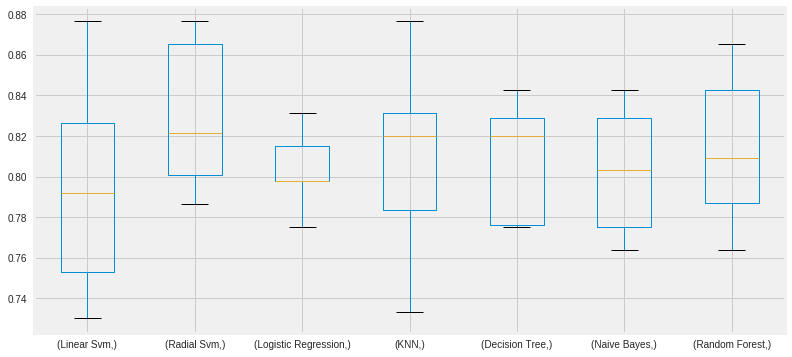

In [78]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

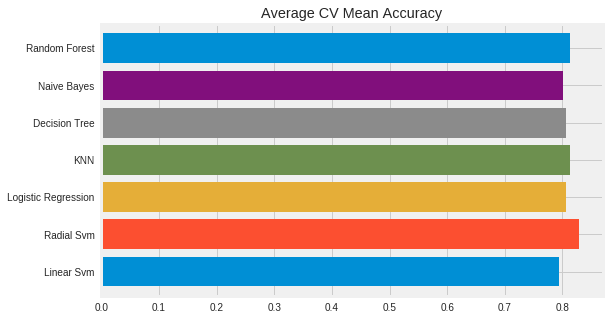

In [80]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

분류 정확도는 때때로 불균형 때문에 오도될 수 있습니다. 어디에서 모델이 잘못되었는지, 어떤 클래스가 잘못되었는지 보여주는 혼란 매트릭스의 도움으로 요약된 결과를 얻을 수 있습니다.

**Confusion Matrix**

그것은 분류자가 만든 정확하고 부정확한 분류의 수를 제공한다.

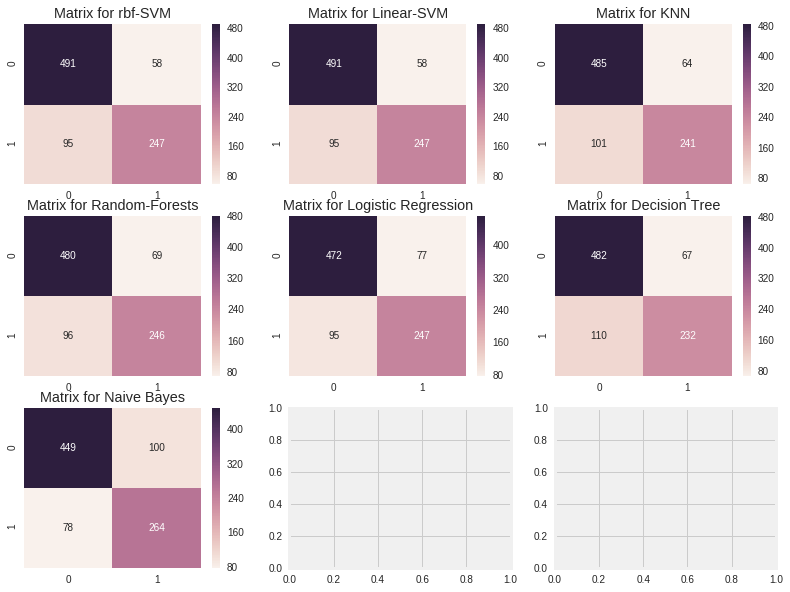

In [82]:
f, ax = plt.subplots(3,3,figsize=(12,10))

y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_prd = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred=cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

**Interpreting Confusion Matrix**

왼쪽 대각선은 각 클래스에 대해 올바른 예측의 수를 나타내고 오른쪽 대각선은 잘못된 사전 선언의 수를 나타냅니다. rbf-SVM에 대한 첫 번째 그림을 살펴보겠습니다.

1)정확한 예측의 수는 491(사망한 경우) + 247(생존된 경우)이며, 평균 CV 정확도는 (491+247)/891 = 82.8 %였습니다.

2)거울은...) 58명의 사망자를 생존자로 잘못 분류했고 95명은 사망자로 분류했다. 그래서 그것은 살아남은 죽음을 예측함으로써 더 많은 실수를 했다.

모든 매트릭스를 살펴봄으로써, 우리는 rbf-SVM이 죽은 승객을 정확하게 예측할 수 있는 더 높은 기회를 가졌다고 말할 수 있다.

**Hyper-Parameters Tuning**

기계 학습 모델은 블랙박스 같다. 이 Black-Box에는 더 나은 모델을 얻기 위해 조정하거나 변경할 수 있는 몇 가지 기본 매개 변수 값이 있습니다. SVM 모델의 C 및 감마와 마찬가지로 다른 분류자에 대해서도 비슷한 매개변수를 하이퍼 파라미터라고 부르는데, 이를 알고리즘의 학습 속도를 변경하고 더 나은 모델을 얻을 수 있다. 이를 Hyper-Parameter Tuning이라고 합니다.

SVM과 RandomForests 중 가장 우수한 두 분류자(SVM 및 RandomForests)에 대해 하이퍼 파라미터의 튜닝이 이루어집니다.

**SVM**

In [83]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 240 candidates, totalling 720 fits
0.8282828282828283
SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:   14.6s finished


**Random Forests**

In [84]:
n_estimators=range(100,1000,100)
hyper = {'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   18.2s finished


0.8170594837261503
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=900, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


Rbf-Svm의 최고 점수는 82.82%이고 C=0.05 및 감마=0.1입니다. 랜덤포리스트의 경우 점수는 abt 81.8%, n_estimators=900입니다.

**Ensembling**

앙상블은 모델의 정확성이나 성능을 높이는 좋은 방법입니다. 간단히 말해서, 그것은 하나의 강력한 모델을 만들기 위한 다양한 간단한 모델의 조합이다.

우리가 전화기를 사려하고 많은 사람들에게 다양한 매개변수를 바 탕으로 그것에 대해 묻고싶다고 하자. 그래서 우리는 모든 다른 변수들을 분석한 후에 단일 제품에 대한 강한 판단을 할 수 있다. 이것은 모델의 안정성을 향상시키는 앙상블입니다. 앙상블은 다음과 같은 방법으로 수행할 수 있습니다.

1) 투표 분류기

2)배깅

3)부스팅

**Voting Classifier**

이것은 많은 다른 간단한 기계 학습 모델의 예측을 결합하는 가장 간단한 방법입니다. 그것은 모든 서브모델의 예측에 기초한 평균 예측 결과를 제공한다. 서브모델이나 베이스모델은 모두 다른 종류이다.

In [86]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf = VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                               ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                               ('RFor',RandomForestClassifier(n_estimators=500, random_state=0)),
                                               ('LR',LogisticRegression(C=0.05)),
                                               ('DT',DecisionTreeClassifier(random_state=0)),
                                               ('NB',GaussianNB()),
                                               ('svm',svm.SVC(kernel='linear',probability=True))
                                               ],
                                   voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:', ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y,cv=10,scoring = "accuracy")
print("The cross validated score is", cross.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


The accuracy for ensembled model is: 0.8246268656716418


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

The cross validated score is 0.8226549199863806


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


**Bagging**

배깅은 일반적인 앙상블 방법이다. 유사한 분류자를 데이터 세트의 작은 파티션에 적용한 다음 모든 예측의 평균을 취함으로써 작동합니다. 평균 때문에, 분산이 줄어든다. 투표 분류기와 달리, 배깅은 유사한 분류자를 사용합니다.

배깅된 KNN
배깅은 분산이 높은 모델에 가장 적합합니다. 결정 트리 또는 랜덤 포레스트를 예로 들 수 있습니다. N_Neleves의 작은 값이 있는 KNN을 n_nearours의 작은 값으로 사용할 수 있다.

In [87]:
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged KNN is:', metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated scored for bagged KNN is :', result.mean())

The accuracy for bagged KNN is: 0.835820895522388
The cross validated scored for bagged KNN is : 0.8148893428668709


**Bagged DecisionTree**

In [89]:
model = BaggingClassifier(base_estimator = DecisionTreeClassifier(), random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8246268656716418
The cross validated score for bagged Decision Tree is: 0.8204826353421859


**Boosting**

Boosting은 분류자의 순차적 학습을 사용하는 조립 기법입니다. 그것은 약한 모델의 단계적 강화이다.Boosting은 다음과 같이 작동합니다.

모델은 먼저 전체 데이터 세트에 대해 교육됩니다. 이제 모델은 몇 가지 예시를 올바르게 제공하지만 일부는 그렇지 않습니다. 이제 다음 반복에서 학습자는 잘못 예측된 인스턴스에 더 초점을 맞추거나 더 많은 비중을 둘 것입니다. 따라서 잘못된 인스턴스를 올바르게 예측하려고 합니다. 이제 이 반복 프로세스는 지속되며, 정확도에 대한 한계에 도달할 때까지 새로운 분류기가 모형에 추가됩니다.

AdaBoost(Adaptive Boosting)
이 경우 학습자 또는 추정자는 결정 트리입니다. 그러나 dafault base_estimator를 선택한 알고리즘으로 변경할 수 있습니다.

In [90]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result = cross_val_score(ada,X,Y,cv=10,scoring = 'accuracy')
print('The cross validated score for AdaBoost is:', result.mean())

The cross validated score for AdaBoost is: 0.8249526160481218


**Stochastic Gradient Boosting**

여기 너무 약한 학습자는 의사결정 나무이다.

In [91]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result = cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8182862331176939


**XGBoost**

In [92]:
import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result = cross_val_score(xgboost,X,Y,cv=10,scoring = "accuracy")
print("The cross validated score for XGBoost is:", result.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

The cross validated score for XGBoost is: 0.8104710021563954


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


우리는 AdaBoost의 최고 정확도를 얻었다. Hyper-Parameter Tuning으로 확대해 보겠습니다.

**Hyper-Parameter Tuning for AdaBoost**

In [93]:
n_estimators = list(range(100,1100,100))
learn_rate = [0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper = {'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  4.8min finished


0.8316498316498316
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.05, n_estimators=200, random_state=None)


**Confusion Matrix for the Best Model**

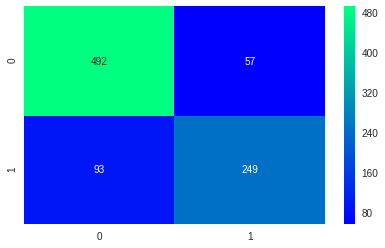

In [95]:
ada =AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate = 0.05)
result = cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

**Feature Importance**

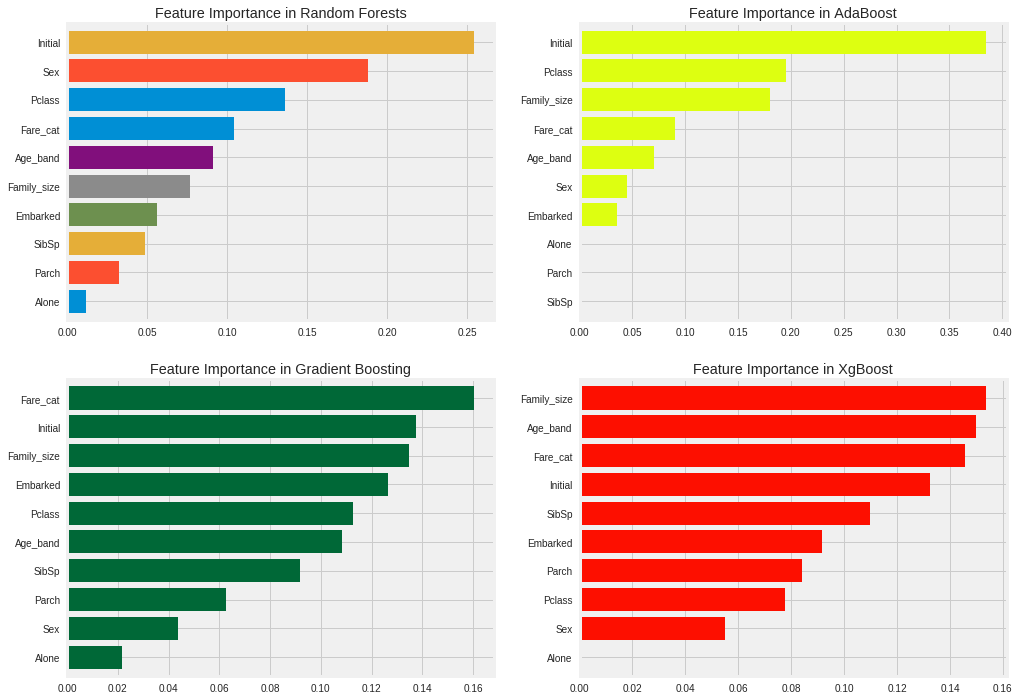

In [96]:
f, ax = plt.subplots(2,2,figsize = (15,12))

model = RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)

pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)

pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)

pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)

pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

랜덤포레스트, AdaBoost, 등 다양한 분류자의 중요한 특징을 볼 수 있습니다.

**Observations:**

1) Initial,Fare_cat,Pclass,Family_Size 등의 주요 피쳐들이 있습니다.

2)성별 기능은 별로 중요하지 않은 것 같으나, 앞에서 P클래스와 결합된 성(Sex)이 매우 뛰어난 차별화 요소를 제공한다는 점을 확인했으므로 충격적입니다. 성별은 랜덤포리스트에서만 중요한 것으로 보입니다.

그러나 많은 분류자에서 맨 위에 있는 Initial 피쳐를 볼 수 있습니다.우리는 이미 성별과 이니셜 사이의 긍정적인 상관관계를 보았고, 그래서 그들은 둘 다 성별을 언급했습니다.

3)Pclass 및 Fare_cat와 마찬가지로 승객 및 가족_알론, 페이지 및 Sibsp의 상태


유사하게도 Pclass와 Fare_cat은 탑승객과 혼자, 부모와 형제를 둔가족의크기의 상태를 나타냅니다...??